# Task 1

Playing with kitten photo

In [ ]:
import os
import cv2 # openCV
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
!curl -o "cat.jpg" "https://placekitten.com/500/300"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9122    0  9122    0     0   9129      0 --:--:-- --:--:-- --:--:--  9122


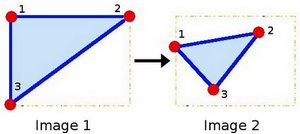

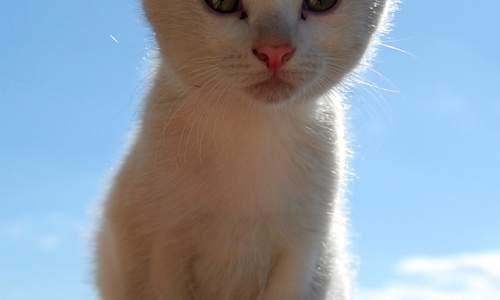

In [ ]:
from __future__ import print_function
import cv2 as cv
import numpy as np
src = cv.imread("cat.jpg")
cv2_imshow(src)

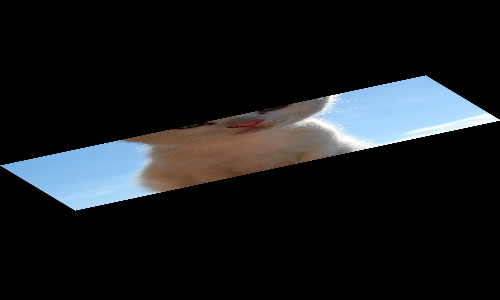

In [ ]:
srcTri = np.array( [[0, 0], [src.shape[1] - 1, 0], [0, src.shape[0] - 1]] ).astype(np.float32)
dstTri = np.array( [[0, src.shape[1]*0.33], [src.shape[1]*0.85, src.shape[0]*0.25], [src.shape[1]*0.15, src.shape[0]*0.7]] ).astype(np.float32)
warp_mat = cv.getAffineTransform(srcTri, dstTri)
warp_dst = cv.warpAffine(src, warp_mat, (src.shape[1], src.shape[0]))
cv2_imshow(warp_dst)

In [ ]:
warp_mat

array([[ 8.51703407e-01,  2.50836120e-01,  0.00000000e+00],
       [-1.80360721e-01,  1.50501672e-01,  1.65000000e+02]])

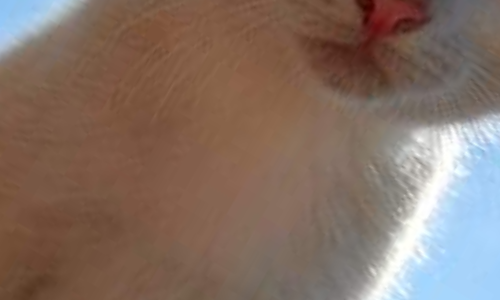

In [ ]:
# Rotating the image
center = (src.shape[1]//2, src.shape[0]//2)
angle = -30
scale = 2
rot_mat = cv.getRotationMatrix2D( center, angle, scale )
warp_rotate_dst = cv.warpAffine(src, rot_mat, (src.shape[1], src.shape[0]))
cv2_imshow(warp_rotate_dst)

In [ ]:
rot_mat

array([[   1.73205081,   -1.        ,  -33.01270189],
       [   1.        ,    1.73205081, -359.80762114]])

In [ ]:
import sympy as sp
from sympy import cos, sin
ang = sp.Symbol('alpha')
xc = sp.Symbol('x_c')
yc = sp.Symbol('y_c')


In [ ]:
H_mat = sp.Matrix([[cos(-ang), -sin(-ang), 0],[sin(-ang),cos(-ang),0],[0,0,1]])*sp.Matrix([[1,0,-xc],[0,1,-yc],[0,0,1]])
sp.latex(H_mat)

'\\left[\\begin{matrix}\\cos{\\left(\\alpha \\right)} & \\sin{\\left(\\alpha \\right)} & - x_{c} \\cos{\\left(\\alpha \\right)} - y_{c} \\sin{\\left(\\alpha \\right)}\\\\- \\sin{\\left(\\alpha \\right)} & \\cos{\\left(\\alpha \\right)} & x_{c} \\sin{\\left(\\alpha \\right)} - y_{c} \\cos{\\left(\\alpha \\right)}\\\\0 & 0 & 1\\end{matrix}\\right]'

# Task 2

Using the picture as an input data

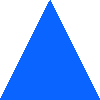

And applying affine transformations to it, as well as v/hstack ($np.hstack(),\ np.vstack()$), get the following result

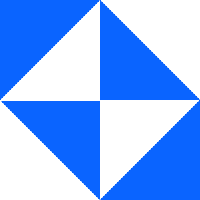

*Tip: try using different types of transformations: reflection, rotation, etc.

In [ ]:
import os
import cv2 as cv # openCV
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

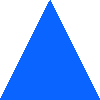

In [ ]:
image = np.ones((100, 100, 3), np.uint8) * 255

pt1 = (50, 00)
pt2 = (0, 100)
pt3 = (100, 100)
triangle_cnt = np.array( [pt1, pt2, pt3] )

cv.drawContours(image, [triangle_cnt], 0, (255,100,10), -1)
cv2_imshow(image)
src = image

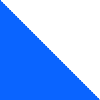

In [ ]:
srcTri = np.array( [list(pt1), list(pt2), list(pt3)] ).astype(np.float32)
dstTri = np.array( [[0, 0], list(pt2), list(pt3)] ).astype(np.float32)
warp_mat = cv.getAffineTransform(srcTri, dstTri)
warp_dst = cv.warpAffine(src, warp_mat, (src.shape[1], src.shape[0]),borderMode=cv.BORDER_CONSTANT, borderValue=(255,255,255))
cv2_imshow(warp_dst)
basa = warp_dst

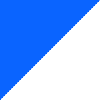

In [ ]:
 M = np.float32([[1, 0, 0],
                 [ 0, -1, src.shape[1]-1]])

basa1 = cv.warpAffine(basa, M, (src.shape[1], src.shape[0]))
cv2_imshow(basa1)

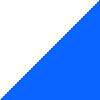

In [ ]:
 M = np.float32([[-1, 0, src.shape[0]-1],
                 [ 0, 1, 0]])

basa2 = cv.warpAffine(basa, M, (src.shape[1], src.shape[0]))
cv2_imshow(basa2)

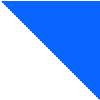

In [ ]:
center = (src.shape[1]//2, src.shape[0]//2)
angle = 180
scale = 1
rot_mat = cv.getRotationMatrix2D( center, angle, scale )
basa3 = cv.warpAffine(basa, rot_mat, (src.shape[1], src.shape[0]),borderMode=cv.BORDER_CONSTANT, borderValue=(255,255,255))
cv2_imshow(basa3)

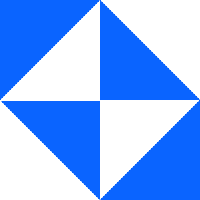

In [ ]:
numpy_vertical1 = np.vstack((basa1, basa3))
numpy_vertical2 = np.vstack((basa, basa2))
numnym = np.hstack((numpy_vertical1,numpy_vertical2))
cv2_imshow(numnym)